# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html

In [14]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt

# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [15]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        

    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        
        # CODE HERE: implement the stochastic dynamics as described in Q1. 
        # Please note, we provide you with the deterministic transition function "take_action" below.
        # Therefore, you only have to implement the logics of the stochasticity.
        
        #Implementing the 80% desired direction and 10% perpendicular directions rule
        #We use numpy random function to make the probabilistic choices
        
        if act == "UP":
            probNum = np.random.choice(10,1)
            if probNum < 8:
                pos_state = state + self.action_space["UP"]
            elif probNum == 8:
                pos_state = state + self.action_space["RIGHT"]
            elif probNum == 9:
                pos_state = state + self.action_space["LEFT"]
                
        elif act == "DOWN":
            probNum = np.random.choice(10,1)
            if probNum < 8:
                pos_state = state + self.action_space["DOWN"]
            elif probNum == 8:
                pos_state = state + self.action_space["RIGHT"]
            elif probNum == 9:
                pos_state = state + self.action_space["LEFT"]
                
        elif act == "RIGHT":
            probNum = np.random.choice(10,1)
            if probNum < 8:
                pos_state = state + self.action_space["RIGHT"]
            elif probNum == 8:
                pos_state = state + self.action_space["DOWN"]
            elif probNum == 9:
                pos_state = state + self.action_space["UP"]
                
        elif act == "LEFT":
            probNum = np.random.choice(10,1)
            if probNum < 8:
                pos_state = state + self.action_space["LEFT"]
            elif probNum == 8:
                pos_state = state + self.action_space["DOWN"]
            elif probNum == 9:
                pos_state = state + self.action_space["UP"]
            
        #Implementing the out of bound condition by checking if the coordinates are -1 or greater than 10
        #The wall positions are detected by converting our coordinate system to 2d np array positions
        
        if pos_state[0] == -1 or pos_state[0] > 10 or pos_state[1] == -1 or pos_state[1] > 10 or \
        self.four_room_space[(10 - pos_state[1]),pos_state[0]] == 1:
            next_state = state
        else:
            next_state = pos_state
        

        # CODE HERE: compute the reward based on the resulting state
        
        #Check if [10,10] is reached for a reward of +1
        
        if next_state[0] == 10 and next_state[1] == 10:
            reward = 1
        else:
            reward = 0
        

        # return the current state, reward
        return next_state, reward
        

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [16]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [17]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 10

    # create a loop
    for t in range(time_step):
        
        # CODE HERE: implement your manual agent/policy function that takes in the action from the standard input
        
        #Made a dictionary to associate keystrokes w,a,s,d to standard "gaming" directions
        #while loop to keep prompting for a proper stroke before continuing
        
        actionDict = {'a':"LEFT", 'w':"UP", 's':"DOWN", 'd':"RIGHT"}
        keyStroke = input("Enter the direction you want A(left) W(up) D(right) S(down)")
        while keyStroke not in ['a','w','d','s']:
            keyStroke = input("Enter the direction you want A(left) W(up) D(right) S(down)")
            if keyStroke in ['a','w','d','s']:
                break
                
        #Obtain the direction from the keystroke
        
        if keyStroke in ['a','w','d','s']:
            action = actionDict[keyStroke]

        # CODE HERE: implement the code to interact with the Four Rooms environment above.
        # it should takes in the current state and action and returns the next_state and a reward
        # Hint: use the step function that you implement.
        
        #Get the next state and reward values from the class object
        
        next_state, reward = env.step(state,action)[0], env.step(state,action)[1]
        
        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")

        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

Enter the direction you want A(left) W(up) D(right) S(down)d
Step = 0, state = [0, 0], action = RIGHT, next state = [1 0], reward = 0
Enter the direction you want A(left) W(up) D(right) S(down)s
Step = 1, state = [1 0], action = DOWN, next state = [1 0], reward = 0
Enter the direction you want A(left) W(up) D(right) S(down)d
Step = 2, state = [1 0], action = RIGHT, next state = [1 0], reward = 0
Enter the direction you want A(left) W(up) D(right) S(down)s
Step = 3, state = [1 0], action = DOWN, next state = [1 0], reward = 0
Enter the direction you want A(left) W(up) D(right) S(down)d
Step = 4, state = [1 0], action = RIGHT, next state = [1 1], reward = 0
Enter the direction you want A(left) W(up) D(right) S(down)s
Step = 5, state = [1 1], action = DOWN, next state = [2 1], reward = 0
Enter the direction you want A(left) W(up) D(right) S(down)d
Step = 6, state = [2 1], action = RIGHT, next state = [3 1], reward = 0
Enter the direction you want A(left) W(up) D(right) S(down)s
Step = 7, 

# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

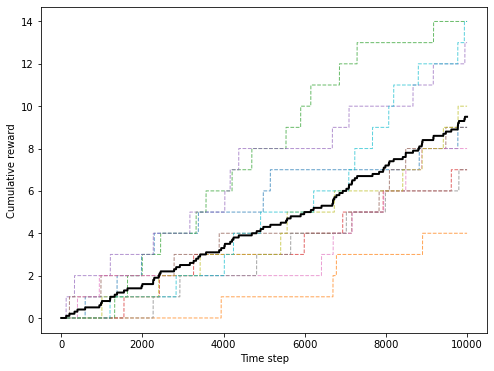

In [18]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            
            #Made a list of directions and used random choice to randomly pick from the list
            
            actionList = ["UP", "DOWN", "LEFT", "RIGHT"]
            action = random.choice(actionList)
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            
            #Get the next state and reward values from the class object
            
            next_state, reward = env.step(state,action)[0], env.step(state,action)[1]
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

# 4 Implement better & worse policies against the Random Policy

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

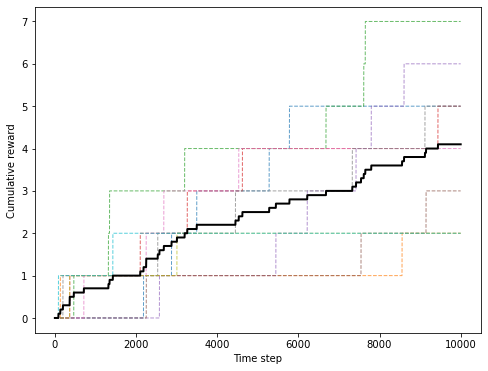

In [19]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list_worse = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action
            
            #Randomly pick between UP and RIGHT so it reaches the goal since we have knowledge of the map 
            #but also not optimally since there is a great chance it gets stuck in the wall for lot of time steps
            
            actionList = ["UP","RIGHT"]
            action = random.choice(actionList)
                       
            # CODE HERE: please implement the code to get the next state and reward
            
            #Get the next state and reward values from the class object
            
            next_state, reward = env.step(state,action)[0], env.step(state,action)[1]
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list_worse.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list_worse)

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

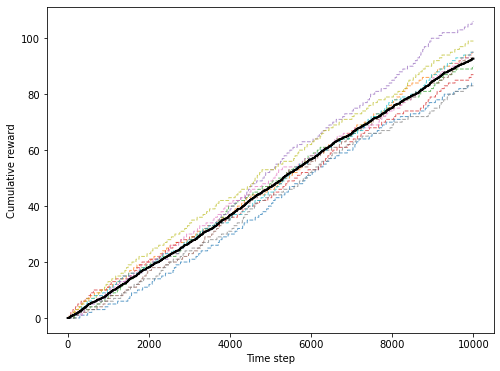

In [20]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list_better = []
    
    n = 0
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is better than the random policy.
            # It should takes in the current state and output an action
            
            #For the better case, we do a simple logic where 
            #if x < 6, the agent selects right if under or at 1(where the opening is) or goes down to 1
            #if x > 6, we keep going up since the stoichasity will guide us to the goal
            
            if state[0] < 6:
                if state[1] > 1:
                    action = "DOWN"
                else:
                    action = "RIGHT"
            elif state[0] >= 6:
                action = "UP"
                       
            # CODE HERE: please implement the code to get the next state and reward
            
            #Get the next state and reward values from the class object
            
            next_state, reward = env.step(state,action)[0], env.step(state,action)[1]
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list_better.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list_better)

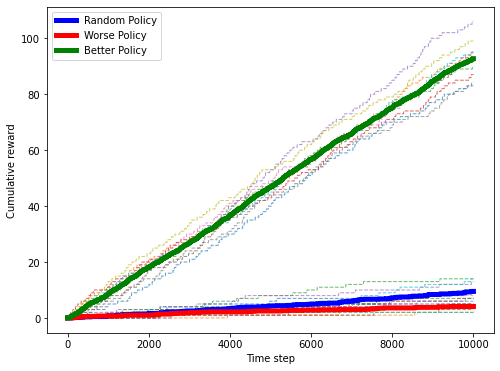

In [21]:
# Plot of all 3 graphs

# set the figure size
plt.figure(figsize=(8, 6))
    
# plot each trial
for re in rewards_list:
    plt.plot(list(range(len(rewards_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)
for re in rewards_list_worse:
    plt.plot(list(range(len(rewards_list_worse[0]))), re, linestyle="--", linewidth=1, alpha=0.7)
for re in rewards_list_better:
    plt.plot(list(range(len(rewards_list_better[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

# plot mean reward
mean_reward = np.array(rewards_list).mean(axis=0).tolist()
plt.plot(list(range(len(rewards_list[0]))), mean_reward, linestyle="-", linewidth=5, color="blue", label = 'Random Policy')
mean_reward_worse = np.array(rewards_list_worse).mean(axis=0).tolist()
plt.plot(list(range(len(rewards_list_worse[0]))), mean_reward_worse, linestyle="-", linewidth=5, color="red", label = 'Worse Policy')
mean_reward_better = np.array(rewards_list_better).mean(axis=0).tolist()
plt.plot(list(range(len(rewards_list_better[0]))), mean_reward_better, linestyle="-", linewidth=5, color="green", label = 'Better Policy')

# plot the figure
plt.ylabel("Cumulative reward")
plt.xlabel("Time step")
plt.legend()
plt.show()
